# review D003

In [3]:
#載入DataFrame 及 畫圖的套件
import pandas as pd   #DataFrame
import matplotlib.pyplot as plt  #畫圖
# import seaborn as sns    #可美化作圖


#如果不想要每次在jupyter notebook顯示都寫.show()，可以在jupyter notebook加上%matplotlib inline
%matplotlib inline    

# DataFrame --  Pandas 
- 在介紹Pandas之前有許多書籍會提到Numpy，主要原因是因為Pandas背後的數值型態都是Numpy，Numpy的資料結構可以幫助Pandas在執行運算上更有效率以及更省記憶體。舉例來說Python的內建資料結構list可以塞好幾種不同type的資料進去，如下所示，這個list裡面的資料有string, int, float，但對於機器來說，要提升效能或是提升記憶體省用效率最好有一致的型別會比較好。
https://medium.com/jameslearningnote/%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90-%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E7%AC%AC2-3%E8%AC%9B-pandas-%E5%9F%BA%E6%9C%ACfunction%E4%BB%8B%E7%B4%B9-series-dataframe-selection-grouping-447a3fa90b60

In [4]:
import pandas as pd
import numpy as np

In [4]:
list2 = ["1", 2, 3., 4, 5]
list2

['1', 2, 3.0, 4, 5]

In [5]:
#使用numpy的array資料結構會強迫把裡面的資料都轉成同一型態
np.array(list2)

array(['1', '2', '3.0', '4', '5'], dtype='<U3')

## I. Pandas主要有兩大資料結構：

- 1. Series 欄位(一維度)
- 2. DataFrame 表格（二維度）
- 3. Panel 三維表格(除了特殊需求之外少使用)

一個 DataFrame 可以解構為多個 Series，一個 Series 可以再解構為 ndarray，ndarray 可以再解構取得之中的數字、布林或文字。
而 Panel 則是能儲存多個 DataFrame 資料結構。
https://medium.com/datainpoint/%E5%BE%9E-pandas-%E9%96%8B%E5%A7%8B-python-%E8%88%87%E8%B3%87%E6%96%99%E7%A7%91%E5%AD%B8%E4%B9%8B%E6%97%85-8dee36796d4a

#### 利用pd.DataFrame函式創立dataframe

#### 方法一

In [5]:
data = {'weekday': ['Sun', 'Sun', 'Mon', 'Mon'],
        'city': ['Austin', 'Dallas', 'Austin', 'Dallas'],
        'visitor': [139, 237, 326, 456]}

In [6]:
visitors_1 = pd.DataFrame(data)
print(visitors_1)

  weekday    city  visitor
0     Sun  Austin      139
1     Sun  Dallas      237
2     Mon  Austin      326
3     Mon  Dallas      456


#### 方法二

In [4]:
cities = ['Austin', 'Dallas', 'Austin', 'Dallas']
weekdays = ['Sun', 'Sun', 'Mon', 'Mon']
visitors = [139, 237, 326, 456]

list_labels = ['city', 'weekday', 'visitor']
list_cols = [cities, weekdays, visitors]

zipped = list(zip(list_labels, list_cols))

In [5]:
visitors_2 = pd.DataFrame(dict(zipped))
print(visitors_2)

     city  visitor weekday
0  Austin      139     Sun
1  Dallas      237     Sun
2  Austin      326     Mon
3  Dallas      456     Mon


#### 使用Pandas 匯入資料-- pd.read_csv(csv_file), pd.read_excel(xlsx_file), or pd.read_table(txt_file).....
- pandas 可以支援多種文字、二進位檔案與資料庫的資料載入，常見的 txt、csv、excel 試算表、MySQL 或 PostgreSQL 都難不倒.....


In [7]:
# 讀入 csv 文字檔
csv_file = "https://storage.googleapis.com/learn_pd_like_tidyverse/gapminder.csv"
gapminder = pd.read_csv(csv_file)
print(type(gapminder))
print(f"前五筆資料:\n {gapminder.head()}")

<class 'pandas.core.frame.DataFrame'>
前五筆資料:
        country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106


## II. 預視資料 及 繪圖
#### pandas 有一些好用的屬性與方法可以快速暸解一個 DataFrame 的外觀與內容：

- df.shape：這個 DataFrame 有幾列有幾欄
- df.columns：這個 DataFrame 的變數資訊
- df.index：這個 DataFrame 的列索引資訊
- df.info()：關於 DataFrame 的詳細資訊


##### Simple Aggregation in Pandas: 
basic statistics 
- count：  Number of non-null observations
- sum：	 Sum of values
- mean：	 Mean of values
- mad：	 Mean absolute deviation
- median： Arithmetic median of values
- min：	 Minimum
- max：	 Maximum
- mode：	 Mode
- abs：	 Absolute Value
- prod：	 Product of values
- std：	 Unbiased standard deviation
- var：	 Unbiased variance
- sem：	 Unbiased standard error of the mean
- skew：	 Unbiased skewness (3rd moment)
- kurt：	 Unbiased kurtosis (4th moment)
- quantile：	Sample quantile (value at %)
- cumsum：	Cumulative sum
- cumprod：	Cumulative product
- cummax：	Cumulative maximum
- cummin：	Cumulative minimum
- first(), last()：	First and last item

These are all methods of DataFrame and Series objects.

In [31]:
# 因欄位眾多，先列印相關資訊:有幾筆、幾個欄位、包含那幾個欄位型態 
print(f"關於 DataFrame 的詳細資訊:")
gapminder.info()

關於 DataFrame 的詳細資訊: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
country      1704 non-null object
continent    1704 non-null object
year         1704 non-null int64
lifeExp      1704 non-null float64
pop          1704 non-null int64
gdpPercap    1704 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


In [42]:
print(f"這個 DataFrame 有幾列有幾欄:\n {gapminder.shape}") #(有幾筆, 幾個欄位)
print(f"這個 DataFrame 的變數資訊:\n {gapminder.columns}") #list出欄位名稱
print(f"這個 DataFrame 的列索引資訊:\n {gapminder.index}")

這個 DataFrame 有幾列有幾欄:
 (1704, 6)
這個 DataFrame 的變數資訊:
 Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')
這個 DataFrame 的列索引資訊:
 RangeIndex(start=0, stop=1704, step=1)


In [297]:
# 進階處理：秀出資料欄位的類型與數量 df.dtypes.reset_index()   參考 D018
#print('dtype of each column: ',  df.dtypes.reset_index()) #語法尾端"()"可將結果列為DataFrame: 列出各欄位的資料型態
#df.dtypes.reset_index #語法尾端不加"()" 與 df.info 有相同結果，只是一個dtype: object，而非DataFrame

dtype = gapminder.dtypes.reset_index()
dtype.columns = ["Count", "Column Type"]
dtype = dtype.groupby("Column Type").aggregate('count').reset_index()
print(f'\n秀出資料欄位的類型與數量')
print(dtype)


print(f'\n每個欄位有多少coding: pd.Series.nunique ')
print(gapminder.apply(pd.Series.nunique, axis = 0) )

print(f'\n各欄位Missing的量: \n{gapminder.isnull().sum()}')  #觀察 missing 狀況



秀出資料欄位的類型與數量
  Column Type  Count
0       int64      2
1     float64      3
2      object      2

每個欄位有多少coding: pd.Series.nunique 
country       142
continent       5
year           12
lifeExp      1626
pop          1704
gdpPercap    1704
pop_10000    1704
dtype: int64

各欄位Missing的量: 
country      0
continent    0
year         0
lifeExp      0
pop          0
gdpPercap    0
pop_10000    0
dtype: int64


### 連續型變數 預視
- df.describe():  function is a useful summarisation tool that will quickly display statistics for any variable or group it is applied to.
- > 盒鬚圖（Box plot）  plt.boxplot(df.['col_name'])
- > 直方圖（Histogram） plt.hist(col_samples)

In [49]:
#指定資料的欄位 .select_dtypes
gapminder.select_dtypes(include=["number"])

,year,lifeExp,pop,gdpPercap
0,1952,28.801,8425333,779.445314
1,1957,30.332,9240934,820.853030
2,1962,31.997,10267083,853.100710
3,1967,34.020,11537966,836.197138
4,1972,36.088,13079460,739.981106
5,1977,38.438,14880372,786.113360
6,1982,39.854,12881816,978.011439
7,1987,40.822,13867957,852.395945
8,1992,41.674,16317921,649.341395
9,1997,41.763,22227415,635.341351


In [26]:
#  1.定義 數值欄位
numeric_columns = gapminder.select_dtypes(include=["number"])
#  2. 列出各欄位有幾種coding
gapminder.select_dtypes(include=["number"]).apply(pd.Series.nunique, axis = 0) 
#等同於 gapminder.select_dtypes(include=["float64",  "int64"]) 或是 gapminder.select_dtypes(exclude=["object"])
#  若只有 2 值 (通常是 0,1) 的欄位是否為類別呢？  因此先排除
numeric_cols = list(numeric_columns.columns[list(numeric_columns.apply(lambda x:len(x.unique())!=2 ))])
print (f'原始的數字欄位數量有 {len(numeric_columns.columns)} ')
print (f'經排除整理後純數字的欄位數量有 {len(numeric_cols)} ')
# 檢視這些欄位的數值範圍(原始的數字欄位)
gapminder[numeric_cols].describe()  #count, mean, std, min, 25%, 50%, 75%, max

原始的數字欄位數量有 4 
經排除整理後純數字的欄位數量有 4 


,year,lifeExp,pop,gdpPercap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165877
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846989
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


============================== 箱型圖迴圈 ==============================


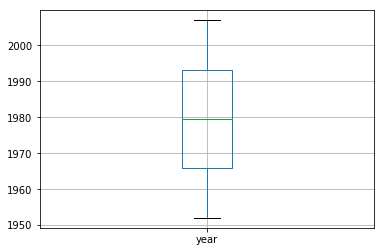

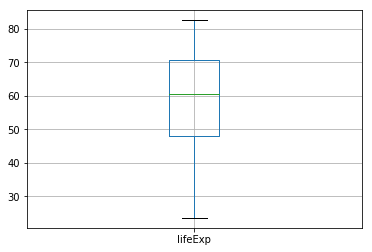

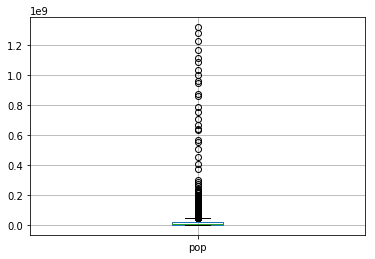

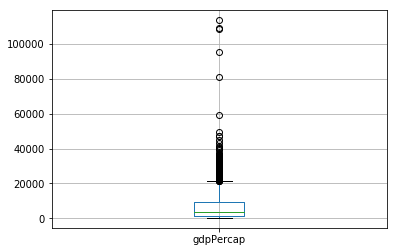

============================== 直方圖迴圈 ==============================


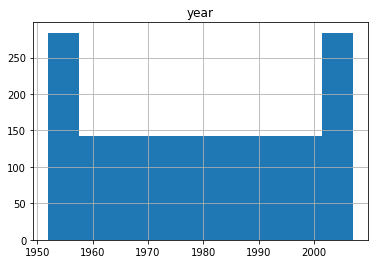

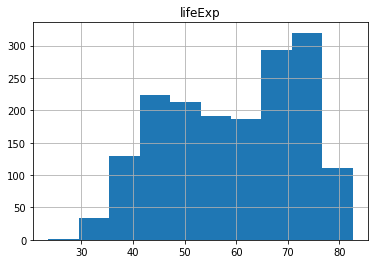

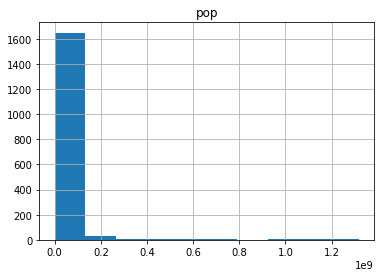

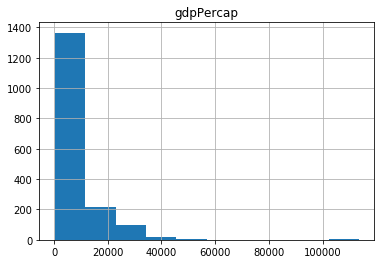

In [91]:
# 連續型資料視覺化 matplotlib   : 連結   https://ithelp.ithome.com.tw/articles/10186484
# 盒鬚圖（Box plot）  plt.boxplot(df.['col_name'])
# 直方圖（Histogram） plt.hist(col_samples)

#起一個簡單的迴圈
print ( "=" *30, "箱型圖 迴圈", "=" *30)
for col in numeric_cols:    #使用迴圈一欄一欄繪製 箱型圖
    numeric_columns[[col]].boxplot()
    plt.show()
print ( "=" *30, "直方圖 迴圈", "=" *30)
for col in numeric_cols:    #使用迴圈一欄一欄繪製 直方圖
    numeric_columns[[col]].hist()
    plt.show()

### 類別型變數 預視
- df[df_name].value_counts()
- > 柱狀圖 plt.bar(cat_value_counts.index, cat_value_counts)
- > 圓餅圖 plt.pie(cat_value_counts, labels = cat_value_counts.index)

In [30]:
#  1.定義 類別欄位:  "category", "object" 等，呈上第二點，若數值欄位coding  只有2 值 (通常是 0,1) 也有可能是類別欄位
category_columns = gapminder.select_dtypes(exclude=["number"]) 
#  2. 列出各欄位有幾種coding  #https://zhuanlan.zhihu.com/p/29986906
#gapminder['country'].value_counts()
#list(gapminder['country'].value_counts().index) 
#DataFrame結構
#pd.crosstab(index=gapminder['country'],  # Make a crosstab
#            columns="count") # Name the count column

#cat_list=list(category_columns.columns.values)
#for cat in cat_list:
#    print(gapminder[cat].value_counts())


#將簡單的迴圈定義一個簡單巨集
def cat_preview(cat_list):
    for cat in cat_list:
        print(gapminder[cat].value_counts())
    return 
cat_preview(category_columns.columns.values) 


South Africa                12
Peru                        12
Haiti                       12
Uruguay                     12
Uganda                      12
Cameroon                    12
Argentina                   12
Philippines                 12
Bosnia and Herzegovina      12
Lesotho                     12
Oman                        12
Turkey                      12
Hong Kong, China            12
Cambodia                    12
Myanmar                     12
United Kingdom              12
Netherlands                 12
Malawi                      12
Mauritius                   12
Sao Tome and Principe       12
Iraq                        12
Swaziland                   12
France                      12
Cuba                        12
Togo                        12
Gambia                      12
Brazil                      12
Panama                      12
Somalia                     12
Lebanon                     12
                            ..
Chad                        12
Zimbabwe

============================== 柱狀圖 ==============================


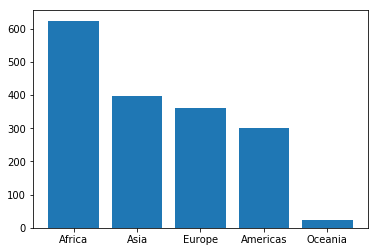

============================== 圓餅圖 ==============================


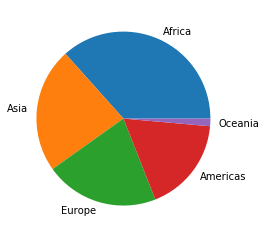

============================== 柱狀圖 迴圈 ==============================


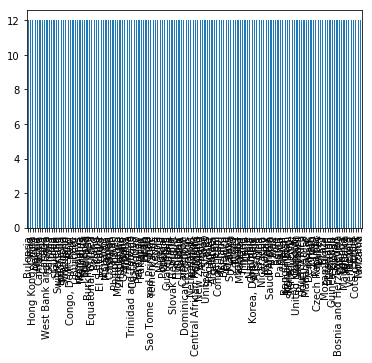

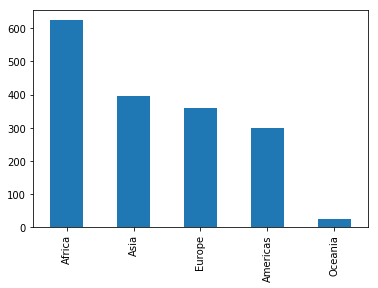

In [92]:
# 類別型資料視覺化 matplotlib(柱狀圖、圓餅圖等): 連結 https://ithelp.ithome.com.tw/articles/10196410
cat_value_counts=gapminder["continent"].value_counts()
print ( "=" *30, "柱狀圖", "=" *30)
plt.bar(cat_value_counts.index, cat_value_counts)
plt.show()
print ( "=" *30, "圓餅圖", "=" *30)
plt.pie(cat_value_counts, labels = cat_value_counts.index)
plt.show()

#for cat in cat_list:
#    gapminder[cat].value_counts().plot('bar')
#    plt.show()

#將簡單的迴圈定義一個簡單巨集
def cat_bar(cat_list):
    for cat in cat_list:
        gapminder[cat].value_counts().plot('bar')
        plt.show()
    return 

print ( "=" *30, "柱狀圖 迴圈", "=" *30)
cat_bar(category_columns.columns.values) 

### 資料分組 預視
https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/

資料截取
- Subset1: 選擇觀察植
- Subset2: 選擇欄位
- Loc[]: 選擇觀察植、欄位
- filter() 多個條件的資料篩選

資料分析
- Grouping data: groupby()
- Aggregating data: aggregate()
- apply() 新增欄位
- lambda 函數計算

In [98]:
# Subset 1.1
#撰寫布林判斷條件將符合條件的觀測值從資料框中篩選出，例如選出臺灣：
gapminder[gapminder['country'] == 'Taiwan'].head()

,country,continent,year,lifeExp,pop,gdpPercap
1500,Taiwan,Asia,1952,58.50,8550362,1206.947913
1501,Taiwan,Asia,1957,62.40,10164215,1507.861290
1502,Taiwan,Asia,1962,65.20,11918938,1822.879028
1503,Taiwan,Asia,1967,67.50,13648692,2643.858681
1504,Taiwan,Asia,1972,69.39,15226039,4062.523897


In [99]:
# Subset 1.2
#如果有多個條件，可以使用 | 或 & 符號連結，例如選出 2007 年的亞洲國家：
gapminder[(gapminder['year'] == 2007) & (gapminder['continent'] == 'Asia')].head()

,country,continent,year,lifeExp,pop,gdpPercap
11,Afghanistan,Asia,2007,43.828,31889923,974.580338
95,Bahrain,Asia,2007,75.635,708573,29796.048340
107,Bangladesh,Asia,2007,64.062,150448339,1391.253792
227,Cambodia,Asia,2007,59.723,14131858,1713.778686
299,China,Asia,2007,72.961,1318683096,4959.114854


In [102]:
# Subset 2.1
#用 list 標註變數名稱可以將變數從資料框中選出，實踐 select() 函數的功能，例如選出 country 與 continent 變數：
gapminder[['country', 'continent']].head()

,country,continent
0,Afghanistan,Asia
1,Afghanistan,Asia
2,Afghanistan,Asia
3,Afghanistan,Asia
4,Afghanistan,Asia


In [103]:
# Subset 2.2
#如果只選一個變數且沒有以 list 標註，同樣能選出變數，但是型別會變為 Series：
country = gapminder['country']
print(type(country))

<class 'pandas.core.series.Series'>


In [137]:
# Loc[]
gapminder.loc[0:20,["pop", "year", "continent"]]

,pop,year,continent
0,8425333,1952,Asia
1,9240934,1957,Asia
2,10267083,1962,Asia
3,11537966,1967,Asia
4,13079460,1972,Asia
5,14880372,1977,Asia
6,12881816,1982,Asia
7,13867957,1987,Asia
8,16317921,1992,Asia
9,22227415,1997,Asia


In [203]:
#filter() + groupby() 多個條件的資料篩選
def filter_func(x):
    return x["pop"].sum() < 6185000000
 #display DEMO dataFrame 
display('gapminder', gapminder.head(), 
        "gapminder.groupby('continent').sum()", gapminder.groupby('continent').sum(), 
        "gapminder.groupby('continent').filter(filter_func)", gapminder.groupby('continent').filter(filter_func).head())

'gapminder'

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


"gapminder.groupby('continent').sum()"

,year,lifeExp,pop,gdpPercap
continent,,,,
Africa,1235208,30491.96600,6187585961,1.368903e+06
Americas,593850,19397.62100,7351438499,2.140833e+06
Asia,783882,23785.70168,30507333901,3.129252e+06
Europe,712620,25885.32700,6181115304,5.209011e+06
Oceania,47508,1783.82900,212992136,4.469186e+05


"gapminder.groupby('continent').filter(filter_func)"

,country,continent,year,lifeExp,pop,gdpPercap
12,Albania,Europe,1952,55.23,1282697,1601.056136
13,Albania,Europe,1957,59.28,1476505,1942.284244
14,Albania,Europe,1962,64.82,1728137,2312.888958
15,Albania,Europe,1967,66.22,1984060,2760.196931
16,Albania,Europe,1972,67.69,2263554,3313.422188


In [104]:
# groupby() partI: 每一組的數量
gapminder.groupby(["continent"]).size()

continent
Africa      624
Americas    300
Asia        396
Europe      360
Oceania      24
dtype: int64

In [177]:
# groupby() partII: 每一組的連續描述
gapminder.groupby(["continent"])['pop'].describe()  

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
Africa,624.0,9.916003e+06,1.549092e+07,60011.0,1342075.00,4579311.0,10801489.75,1.350312e+08
Americas,300.0,2.450479e+07,5.097943e+07,662850.0,2962358.75,6227510.0,18340309.00,3.011399e+08
Asia,396.0,7.703872e+07,2.068852e+08,120447.0,3844393.00,14530830.5,46300348.00,1.318683e+09
Europe,360.0,1.716976e+07,2.051944e+07,147962.0,4331500.00,8551125.0,21802867.00,8.240100e+07
Oceania,24.0,8.874672e+06,6.506342e+06,1994794.0,3199212.50,6403491.5,14351625.00,2.043418e+07


In [125]:
# groupby() partIII: produces Pandas Series or DataFrame
#print("produces Pandas Series")
#gapminder.groupby(["continent"])['pop'].sum()

#print("="*30)
print("Produces Pandas DataFrame")
gapminder.groupby(["continent"])[['pop']].sum()

Produces Pandas DataFrame


,pop
continent,
Africa,6187585961
Americas,7351438499
Asia,30507333901
Europe,6181115304
Oceania,212992136


In [129]:
# aggregate() partI 一個變數的指定統計値
grouped = gapminder.agg({"pop": [min, max, sum]}) 
grouped.head()

,pop
min,60011
max,1318683096
sum,50440465801


In [132]:
# aggregate() partII 將每個統計值命名
grouped = gapminder.groupby(["continent"]).agg({"pop": [min, max, sum]}) 
grouped.columns = ["_".join(x) for x in grouped.columns.ravel()]
grouped.head()

,pop_min,pop_max,pop_sum
continent,,,
Africa,60011,135031164,6187585961
Americas,662850,301139947,7351438499
Asia,120447,1318683096,30507333901
Europe,147962,82400996,6181115304
Oceania,1994794,20434176,212992136


In [178]:
# aggregate() partIII 多個變數的指定統計値
gapminder.groupby("continent").aggregate({"pop": 'min',
                                          "year": 'max'})

,pop,year
continent,,
Africa,60011,2007
Americas,662850,2007
Asia,120447,2007
Europe,147962,2007
Oceania,1994794,2007


In [227]:
# aggregate() partIV   較複雜的邏輯可以使用def來定義
# Define the aggregation procedure outside of the groupby operation
aggregations = {
    'pop':{
        'pop_min':'min', 
        'pop_max':'max',
        'pop_sum':'sum'},
    'year': {
        'year_range': lambda x: sum(x)-x.mean()}
}
gapminder.groupby("continent").agg(aggregations)

pop                                year
           pop_min     pop_max      pop_sum year_range
continent                                             
Africa       60011   135031164   6187585961  1233228.5
Americas    662850   301139947   7351438499   591870.5
Asia        120447  1318683096  30507333901   781902.5
Europe      147962    82400996   6181115304   710640.5
Oceania    1994794    20434176    212992136    45528.5

In [254]:
# apply()  新增欄位
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html
gapminder['pop_10000'] = gapminder['pop'].apply(lambda x: x/10000)
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap,pop_10000
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,842.5333
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,924.0934
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,1026.7083
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,1153.7966
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,1307.9460


In [229]:
# 匿名函數 lambda運算式來定義函式，執行運算式時將會產生函式物件。
 #例: 資料轉換
subset=gapminder.loc[0:1000, ["pop", "year", "continent"]]
subset.groupby(["continent"]).transform(lambda x: x / x.mean())   
 #等同於   subset.groupby(["continent"]).apply(lambda x: x / x.mean())

,pop,year
0,0.071355,0.986305
1,0.078262,0.988831
2,0.086953,0.991358
3,0.097716,0.993884
4,0.110771,0.996410
5,0.126023,0.998937
6,0.109097,1.001463
7,0.117449,1.003990
8,0.138198,1.006516
9,0.188246,1.009042


In [267]:
type(list(apminder["pop"])

SyntaxError: unexpected EOF while parsing (<ipython-input-267-25318e541745>, line 1)

In [284]:
# 較複雜的邏輯你可以使用def來定義。
def func(x, y):
    return  x * y
gapminder.apply(lambda gapminder: func(gapminder["pop"], gapminder["year"]), axis=1)  

0       16446250016
1       18084507838
2       20144016846
3       22695179122
4       25792695120
5       29418495444
6       25531759312
7       27555630559
8       32505298632
9       44388147755
10      50587346810
11      64003075461
12       2503824544
13       2889520285
14       3390604794
15       3902646020
16       4463728488
17       4960387896
18       5510152254
19       6110662827
20       6626384016
21       6845791886
22       7024041024
23       7226249661
24      18113632800
25      20100065192
26      21583859976
27      25099901533
28      29108271964
29      33911093508
           ...     
1674    19141398876
1675    22292828580
1676    26629050024
1677    31605514509
1678    37439916514
1679    44578968201
1680     5215744000
1681     5902312000
1682     6712002000
1683     7671300000
1684     8886812084
1685    10313119350
1686    12091006674
1687    14450270722
1688    16695276696
1689    18807324633
1690    21212813622
1691    23574292245
1692     6013930464


將臺灣資料篩選出來並繪製從 1952 年至 2007 年的人口變化：


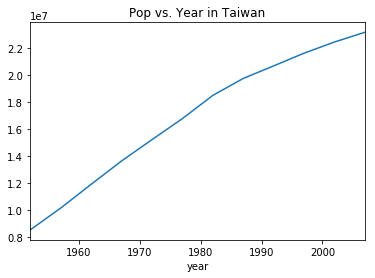

將中國、日本、南韓與臺灣資料篩選出來並繪製從 1952 年至 2007 年的平均壽命變化：


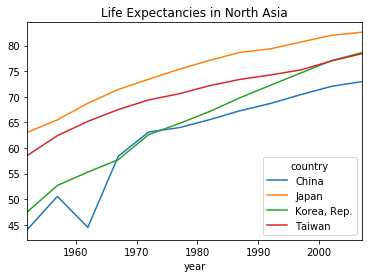

人均所得直方圖依照不同洲別以不同顏色繪製：


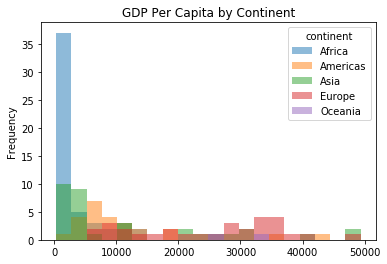

依照不同洲別，將人均所得以盒鬚圖繪製：


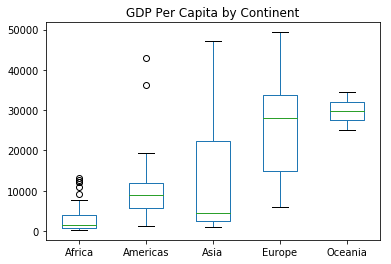

繪製 2007 年各洲平均壽命、平均財富：


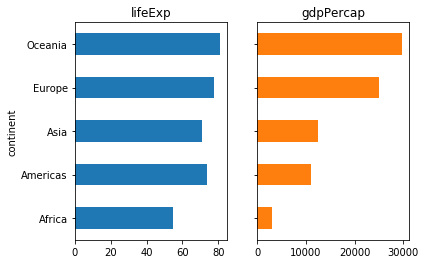

2007 年各國人均所得與平均壽命的散佈圖：


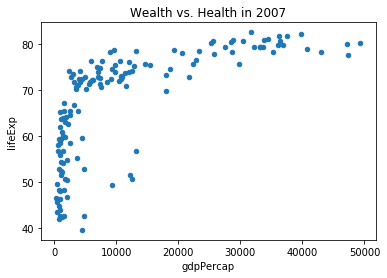

2007 年各國人均所得與平均壽命的 hexbin plot：


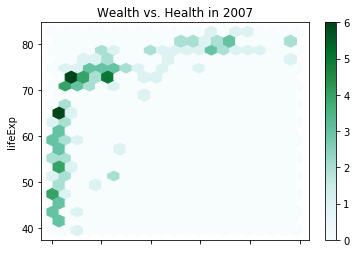

In [292]:
#畫圖
#時間與數值：線圖
print("將臺灣資料篩選出來並繪製從 1952 年至 2007 年的人口變化：")
gapminder_twn = gapminder[gapminder['country'] == 'Taiwan']
gapminder_twn[['year', 'pop']].plot(kind = 'line', x = 'year', y = 'pop', title = 'Pop vs. Year in Taiwan', legend = False)
plt.show()
print("將中國、日本、南韓與臺灣資料篩選出來並繪製從 1952 年至 2007 年的平均壽命變化：")
gapminder_northasia = gapminder.loc[gapminder['country'].isin(['China', 'Japan', 'Korea, Rep.', 'Taiwan'])]
gapminder_northasia_pivot = gapminder_northasia.pivot_table(values = 'lifeExp', columns = 'country', index = 'year')
gapminder_northasia_pivot.plot(title = 'Life Expectancies in North Asia')
plt.show()
#類別與數值：直方圖、箱型圖、柱狀圖
print("人均所得直方圖依照不同洲別以不同顏色繪製：")
gapminder_2007 = gapminder[gapminder['year'] == 2007]
gapminder_continent_pivot = gapminder_2007.pivot_table(values = 'gdpPercap', columns = 'continent', index = 'country')
gapminder_continent_pivot.plot(kind = 'hist', alpha=0.5, bins = 20, title = 'GDP Per Capita by Continent')
plt.show()
print("依照不同洲別，將人均所得以盒鬚圖繪製：")
gapminder_continent_pivot.plot(kind = 'box', title = 'GDP Per Capita by Continent')
plt.show()
print("繪製 2007 年各洲平均壽命、平均財富：")
summarized_df = gapminder[gapminder['year'] == 2007].groupby(by = 'continent')[['lifeExp', 'gdpPercap']].mean()
summarized_df.plot(kind = 'barh', subplots = True, layout = (1, 2), sharex = False, sharey = True, legend = False)
plt.show()
#相關性：散佈圖、hexbin plot
print("2007 年各國人均所得與平均壽命的散佈圖：")
gapminder_2007.plot(kind = 'scatter', x = 'gdpPercap', y = 'lifeExp', title = 'Wealth vs. Health in 2007')
plt.show()
print("2007 年各國人均所得與平均壽命的 hexbin plot：")
gapminder_2007.plot(kind = 'hexbin', x = 'gdpPercap', y = 'lifeExp', title = 'Wealth vs. Health in 2007', gridsize = 20)
plt.show()


## III. 多個資料合併 merge / transform  [review D008]

In [6]:
# 生成範例用的資料 ()
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                   index=[0, 1, 2, 3])
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                   index=[4, 5, 6, 7])
df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                   index=[8, 9, 10, 11])

df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'],
                    'D': ['D2', 'D3', 'D6', 'D7'],
                    'F': ['F2', 'F3', 'F6', 'F7']},
                   index=[2, 3, 6, 7])

In [7]:
# 沿縱軸合併
result = pd.concat([df1, df2, df3])
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [8]:
# 沿橫軸合併
result = pd.concat([df1, df4], axis = 1)
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [9]:
# 沿橫軸合併
result = pd.concat([df1, df4], axis = 1, join = 'inner') # 硬串接
print(result)

result = pd.merge(df1, df4, how='inner')
print(result)

    A   B   C   D   B   D   F
2  A2  B2  C2  D2  B2  D2  F2
3  A3  B3  C3  D3  B3  D3  F3
    A   B   C   D   F
0  A2  B2  C2  D2  F2
1  A3  B3  C3  D3  F3


In [10]:
# 將 欄-列 逐一解開
print(df1)
df1.melt()

    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3


,variable,value
0,A,A0
1,A,A1
2,A,A2
3,A,A3
4,B,B0
5,B,B1
6,B,B2
7,B,B3
8,C,C0
9,C,C1


## 補充

Python 直接賦值、淺拷貝和深度拷貝解析

- 直接賦值：其實就是物件的引用（別名）。
- 淺拷貝(copy)：拷貝父物件，不會拷貝物件的內部的子物件。
- 深拷貝(deepcopy)： copy 模組的 deepcopy 方法，完全拷貝了父物件及其子物件。


In [300]:
# 1、 b = a: 賦值引用，a 和 b 都指向同一個對象。 
# 2、 b = a.copy(): 淺拷貝, a 和 b 是一個獨立的對象，但他們的子物件還是指向統一對象（是引用）。

a = {1: [1,2,3]} 
b = a.copy() 
print(a, b) 

a[1].append(4)
print(a, b) 

{1: [1, 2, 3]} {1: [1, 2, 3]}
{1: [1, 2, 3, 4]} {1: [1, 2, 3, 4]}


In [301]:
# 3、 b = copy.deepcopy(a): 深度拷貝, a 和 b 完全拷貝了父物件及其子物件，兩者是完全獨立的。
import copy 
c = copy.deepcopy(a) 
print(a, c)

a[1].append(5)
print(a, c)

{1: [1, 2, 3, 4]} {1: [1, 2, 3, 4]}
{1: [1, 2, 3, 4, 5]} {1: [1, 2, 3, 4]}


In [302]:
#更多實例
a = [1, 2, 3, 4, ['a', 'b']] #原始對象 
b = a #賦值，傳對象的引用 
c = copy.copy(a) #物件拷貝，淺拷貝 
d = copy.deepcopy(a) #物件拷貝，深拷貝 

a.append(5) #修改對象a 
a[4].append('c') #修改物件a中的['a', 'b']陣列物件 

print( 'a = ', a ) 
print( 'b = ', b ) 
print( 'c = ', c ) 
print( 'd = ', d )

a =  [1, 2, 3, 4, ['a', 'b', 'c'], 5]
b =  [1, 2, 3, 4, ['a', 'b', 'c'], 5]
c =  [1, 2, 3, 4, ['a', 'b', 'c']]
d =  [1, 2, 3, 4, ['a', 'b']]
